In [8]:
# -*- coding:utf-8 -*-
# @Author: Niccolò Bonacchi
# @Date: Thursday, February 21st 2019, 7:13:37 pm
# @Last Modified by: Niccolò Bonacchi
# @Last Modified time: 21-02-2019 07:35:12.1212

from pathlib import Path
import ibllib.io.raw_data_loaders as raw
import matplotlib.pyplot as plt
import numpy as np
import sys

import utils as ut
import pandas as pd
import seaborn as sns

In [9]:
# gets the session path from the user
session_path = ut.selectFolder()

2023-02-05 15:07:02.812 python[9477:13993342] +[CATransaction synchronize] called within transaction
2023-02-05 15:07:02.827 python[9477:13993342] +[CATransaction synchronize] called within transaction
2023-02-05 15:07:19.243 python[9477:13993342] +[CATransaction synchronize] called within transaction


In [10]:
# loads the session data using the ibllib library
data = raw.load_data(session_path)
ut.dictprint(data[0])

init_datetime <class 'str'>
task_protocol <class 'str'>
data_file_path <class 'str'>
data_file <class 'str'>
position_set <class 'list'>
ResponseThresholds <class 'list'>
repeat_on_error <class 'bool'>
repeat_contrasts <class 'list'>
threshold_events_dict <class 'dict'>
quiescent_period_base <class 'float'>
quiescent_period <class 'float'>
response_window <class 'int'>
interactive_delay <class 'float'>
iti_error <class 'int'>
iti_correct_target <class 'int'>
osc_client <class 'str'>
stim_freq <class 'float'>
stim_angles <class 'list'>
stim_gains <class 'list'>
stim_gain <class 'float'>
stim_sigma <class 'float'>
out_tone <class 'list'>
out_noise <class 'list'>
out_stop_sound <class 'list'>
poop_count <class 'bool'>
save_ambient_data <class 'bool'>
as_data <class 'dict'>
reward_amount <class 'float'>
reward_valve_time <class 'float'>
iti_correct <class 'float'>
ac <class 'dict'>
rc <class 'dict'>
contrast_set <class 'list'>
trial_num <class 'int'>
position <class 'int'>
stim_probability

In [11]:
print(type(data), len(data), "(number of trials)")

<class 'list'> 192 (number of trials)


In [12]:
[d['trial_correct'] for d in data]

[True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 T

In [14]:
correct_responses = [d['trial_correct'] for d in data]

# in case the last trial wasn't saved in the encoder_trial_info
if (len(trialInfoDF) >len(correct_responses)):
    diff = len(trialInfoDF) -len(correct_responses)
    print(f'warning, {diff} trial/s are missing from the data dictionary')
    trialInfoDF = trialInfoDF[:len(correct_responses)]

assert (len(trialInfoDF) == len(correct_responses))

# append correct responses
trialInfoDF.loc[:,'correct'] = correct_responses

# get trials with left responses
Left1 = list(np.where((trialInfoDF['stim_angle'].values<=0)& (trialInfoDF['correct'].values>0))[0]) # option 1, angle less or = 0 and correct response
Left2 = list(np.where((trialInfoDF['stim_angle'].values>0)& (trialInfoDF['correct'].values==0))[0]) # option 2, angle bigger than 0 and incorrect response

# join the 2 lists and add 1 to correct for the trialnum indexing starting at 1
lefresponses =np.array(Left1 + Left2)+1

trialInfoDF.loc[:,'LeftTurn'] = False

# assign the left responses to the corresponding trials
trialInfoDF.loc[trialInfoDF.trial_num.isin(lefresponses),'LeftTurn'] = True

# append signed contrasts
trialInfoDF.loc[:,'signedContrast'] = trialInfoDF.stim_contrast.values*trialInfoDF.stim_pos_init.values

NameError: name 'trialInfoDF' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/8f/5wxb25nd0y12wfq_xr45zv5w0000gn/T/ipykernel_9124/2574100294.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels =np.round(np.arange(-0.2,1.2,0.2),2),fontsize = 15)


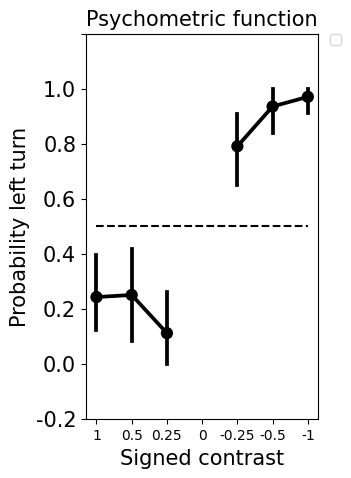

In [14]:
import seaborn as sns
dtp = trialInfoDF
x ='signedContrast'
y = 'LeftTurn'
hue= 'mouse'
minTrial = 30
maxTrial = 1000

fig,ax = plt.subplots(1,1,figsize = (3,5))
order = [1,0.5,0.25,0,-0.25,-0.5,-1]
#ax = sns.pointplot(data = data,x=x,y=y,hue=hue,palette= palette,order = order,alpha = 0.5,aspect = 1.5,dodge=0.2)
ax = sns.pointplot(data = dtp,x=x,y=y,color='black',order = order)
#ax = sns.pointplot(data = data,x=x,y=y)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Psychometric function',fontsize = 15)
ax.set_xlabel('Signed contrast',fontsize = 15)
ax.set_ylabel('Probability left turn',fontsize = 15)
ax.set_ylim(-0.2,1.2)
#ax.set_xticklabels([-45,45],fontsize = 15)
ax.set_yticklabels(labels =np.round(np.arange(-0.2,1.2,0.2),2),fontsize = 15)
ax.axes.hlines(0.5,0,6,linestyles='dashed',color='black')
# ax.axes.hlines(0.70,0,data[x].max()-data[x].min(),linestyles='dashed',color='black')
plt.show()

In [15]:
D=dict()
D['y']= trialInfoDF.LeftTurn.values+1
D['y']

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2])

In [16]:
varstoadd = ['stim_angle','stim_contrast']
outputs = []
for name in varstoadd:
    currenttrial = trialInfoDF[name].values
    prevtrial = np.insert(trialInfoDF[name].values[:-1],0,trialInfoDF[name].values[0])
    assert len(currenttrial) == len(prevtrial)
    both = np.stack([currenttrial,prevtrial]).T
    outputs.append(both)

In [17]:
D['inputs'] =dict()
for idx,name in enumerate(varstoadd):
    D['inputs'][name]= outputs[idx]

In [18]:
D['dayLength'][0] = len(data)

KeyError: 'dayLength'